# Что такое ансамблевое обучение

Термин ансамблевое обучение (ensamble learning) относится к процессу построения множенства моделей и поиску такой их комбинации, которавя позволяет получить лучшие результаты, чем каждая из моделей по отдельности. В качестве индивидуальных моделей могут выступать классификаторы, регрессоры и другие объекты, моделирующие данные каким либо способом. Ансамблевое обучение применяется во многих областях, включая  классификацию данных, предсказательное моделирование, обнаружение аномалий и т.п.

Пример:<br>
Предположим, вы хотите купить новый телевизор, но о последних моделях вам ничего не известно. Ваша задача - купить наилучший телевизор из тех, которые предлагаются по доступной для вас цене, но вы недостаточно хорошо знаете рынок, чтобы сделать обонованный выбор. В подобных случаях вы интересуетесь мнением нескольких экспертов данной области. Так вам легче принять наиболее верное решение. В большинстве случаев вы не будете привязываться к мнению какого-то одного специалиста и примете окончательное решение на онове обощения оценок, сделанных разынми людьми. Мы поступаем так, потому что стремимся свести к минимуму вероятность принятия неверных или недостаточно оптимальных решений.

# Построение моделей обучения посредством ансамблевого метода

При выборе модели чаще всего исходят из того, чтобы она приводила к наименшим ошибкам на тренировочном набборе данных. Проблема заключается в том, что такой подход не всегда работает из-за вохможности переобучения. Даже если перекрестная проверка модели подтверждает ее адекватность, она может приводить к неудволетворительным результатам для неизвестных данных.

Одной из основной причин эффективности ансамблевого обучения является то, что этот метод позволяет снизить общий риск выбра неудачной модели. Благодаря тому, что тренировка осуществляется на широком разнообразии обучающих наборов данных, ансамблевый подход позволяет получать неплохие результаты для неизвестных данных. Если мы создаем модель на основе ансамблевого обучения, то результаты, полученные с использованием индивидуальных моделей, должны проявлять определенный разброс. Это позволяет улавливать всевозможные нюансы, благодаря этому модель оказывается более точной.

Разнообразие результатов достигается за счет использования разных обучающих параметров для индивидуальных моделей, благодаря чему они создают разные границы решений для тренировочных данных. Это значит, что у каждой модели будут использоваться разные правила для логического вывода, тем самым обеспечивая более эффективный способ валидации окончательного результата. 

# Что такое деревья принятия решений

Дерево принятия решений (decision tree) - это структура, позволяющая разбить набор данных на ветви с последующим принятием простых решений на каждом уровне. Окончательное решение получают, спускаясь по ветвям этого дерева. Деревья принятия решений создаются посредством обучающих алгоритмов, определяющих наилучшие способы разбиения данных.

Процесс принятия решения начинается в корневом узле, который находится на вершине дерева. Каждый узел, по сути, представляет собой правило принятия решения. Алгоритмы создают эти правила, исходя из соотношения между входными данными и целевыми метками в тренировочном наборе. Значения входных данных используются для оценки выходных значений.

Энтропия - мера неопределенности. Одним из основных назначений дерева решений является уменьшение степени неопредлеленности по мере продвижения от корневого узла к листьям. В тот момент, когда мы достигаем листового узла, результат становится достоверно известным. Отсюда следует, что дерево принятия решений  необходимо конструировать так, чтобы каждый очередной шаг приводил к уменьшению неопрделенности, то есть, по мере продвижения вниз, по дереву узлов, мы должны уменьшать энтропию.

# Создание классификатора на основе дерева принятия решений

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier

from utilities import visualize_classifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
#загрузка входных данных
input_file = 'data_decision_trees.txt'
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1]

In [3]:
# print(X)
# print(y)

In [4]:
'''Разделим входные данные на два отдельных класса в 
зависимости от целевых меток'''
#разделение входных данных на два класса на основании меток
class_0 = np.array(X[y==0])
class_1 = np.array(X[y==1])

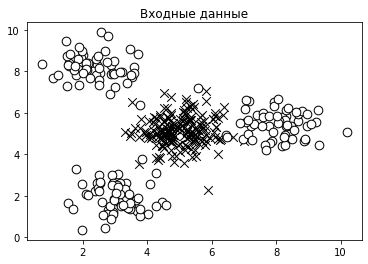

In [5]:
'''Визуализируем входные данные с помощью точечной диаграммы'''
#Визуализация входных данных
plt.figure()
plt.scatter(class_0[:, 0],
            class_0[:, 1],
            s = 75,
            facecolors = 'black',
            edgecolors = 'black',
            linewidths = 1,
            marker = 'x')

plt.scatter(class_1[:, 0],
            class_1[:, 1],
            s = 75,
            facecolors = 'white',
            edgecolors = 'black',
            linewidths = 1,
            marker = 'o')

plt.title('Входные данные')
plt.show()

In [6]:
'''Мы должны разбить данные на обучающий и тестовый наборы'''
#разбиение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.25,
                                                    random_state = 5)

Создадим и визуализируем классификатор, используя обучающий набор данных. <br>
 - Параметр random_state определяет затравочное значение, используемое генератором случайных чисел или необходимое для инициализации алгоритма классификации на основе дерева принятия решений.<br> 
 - Параметр max_depth определяет максимальную глубину дерева, которое мы хотим построить.

		Training dataset


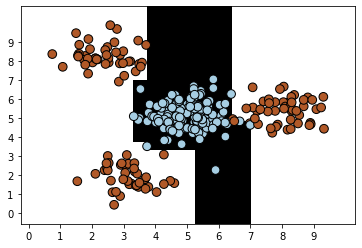

In [7]:
#классификатор на основе дерева принятия решений
params = {'random_state' : 0, 'max_depth' : 4}

classifier = DecisionTreeClassifier(**params)
classifier.fit(X_train, y_train)

print('\t\tTraining dataset')
visualize_classifier(classifier, X_train, y_train)

		Test dataset


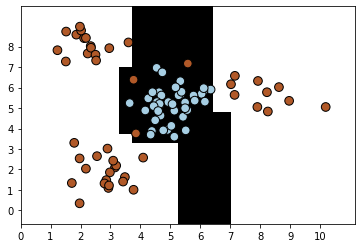

In [8]:
'''Вычислим выходной результат классификатора, полученный 
на тестовом наборе данных, и визуализируем его'''
print('\t\tTest dataset')
visualize_classifier(classifier, X_test, y_test)

		Test predict


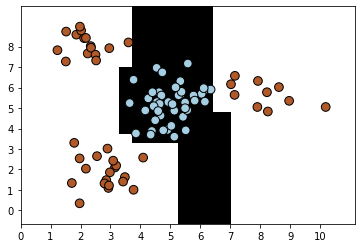

In [9]:
#результат классификатора с предсказанными знаечниями
y_test_pred = classifier.predict(X_test)

print('\t\tTest predict')
visualize_classifier(classifier, X_test, y_test_pred)

In [10]:
'''Оценим работу классификатора, выведя отчет с результатами классификации'''
#оценка работы классификатора
class_names = ['Class-0', 'Class-1']

print('#' * 60)
print('\n\t    Classifier perfomance on training dataset\n')

print(classification_report(y_train, 
                            classifier.predict(X_train), 
                            target_names = class_names))

print('#' * 60 + '\n\n' + '#' * 60)
print('\n\t    Classifier perfomance on test dataset\n')

print(classification_report(y_test,
                            y_test_pred, 
                            target_names = class_names))

print('#' * 60)

############################################################

	    Classifier perfomance on training dataset

              precision    recall  f1-score   support

     Class-0       0.99      1.00      1.00       137
     Class-1       1.00      0.99      1.00       133

    accuracy                           1.00       270
   macro avg       1.00      1.00      1.00       270
weighted avg       1.00      1.00      1.00       270

############################################################

############################################################

	    Classifier perfomance on test dataset

              precision    recall  f1-score   support

     Class-0       0.93      1.00      0.97        43
     Class-1       1.00      0.94      0.97        47

    accuracy                           0.97        90
   macro avg       0.97      0.97      0.97        90
weighted avg       0.97      0.97      0.97        90

############################################################


Работа классификатора характеризуется параметрами $precision (точность)$, $recall (полнота)$ и $f1-score (F- мера)$.
- $Показатель$ $точности$ - это точность классификации<br>
- $Показатель$ $полноты$ - процентная доля количества элементов по отношению к общему количеству элементов, которые должны были быть извлечены в соответствии с ожиданиями.
- $F-мера$ - это гармоническое средее показателей точности и полноты, представляющее разумную сбалансированную оценку работы классификатора